<a href="https://colab.research.google.com/github/Geolist/first-repository/blob/main/Fashion__MNIST__%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터로드
### Fashion MNIST 데이터셋은 케라스에 내장되어 있으며
- fashion_mnist를 임포트하고, load_data()를 호출하여 데이터셋을 로드할 수 있습니다.

- 학습용 데이터셋에서 30% 정도를 검증용 데이터셋으로 만들기 위해서 train_test_split() 함수를 이용해 분리합니다.

- 최종적으로 딥러닝 모델에 사용할 학습, 검증, 테스트 데이터의 갯수를 출력해서 확인합니다.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


### Fashion MNIST 데이터셋에서 사용되는 총 10개의 클래스 이름을 class_names 변수로 지정합니다.

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 학습 데이터의 레이블 y_train에서 0번째가 무엇인지 출력하면 6이 출력되고, 실제 6이 어떤 클래스인지는 미리 정의한 class_names 리스트에 매칭된 이름으로 Shirt가 출력된 것을 알 수 있습니다.

In [3]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


### 학습 데이터는 이미지라서 0~255의 값을 가지고 있고, 이를 이미지로 imshow()를 이용해 출력합니다. 값의 범위를 보기 위해 colorbar()를 이용해 출력합니다.

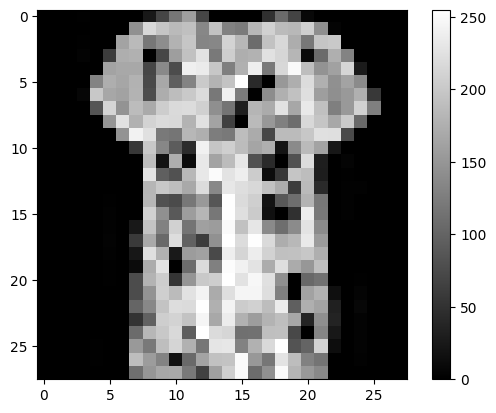

In [4]:
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.show()

### Fashion MNIST 데이터셋을 확인하기 위해서 전체 학습 데이터 60,000개 중에서 랜덤으로 4개를 선택하여 인덱스와 레이블, 그리고 해당 패션 이미지를 출력합니다.

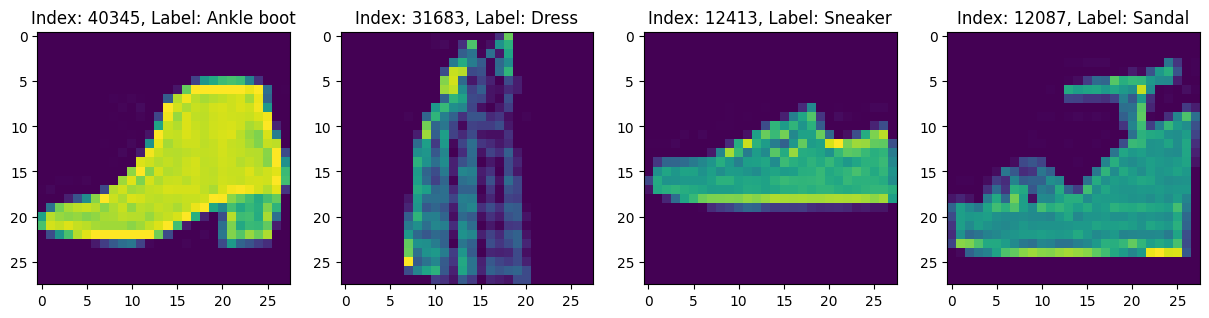

In [5]:
import numpy as np

num_sample = 4  # 1. 표시할 샘플 이미지 개수
random_idxs = np.random.randint(60000, size=num_sample)  # 2. 0~59999 사이에서 랜덤 인덱스 추출

plt.figure(figsize=(15, 10))  # 3. 전체 그림의 크기 설정 (가로 15, 세로 10인치)
for i, idx in enumerate(random_idxs):  # 4. 추출한 인덱스를 반복
    image = x_train_full[idx, :]  # 5. 해당 인덱스의 이미지 데이터 추출 (28x28 이미지)
    label = y_train_full[idx]     # 6. 해당 인덱스의 레이블 값 추출
    plt.subplot(1, len(random_idxs), i+1)  # 7. 1행 N열 중 i+1번째 subplot 생성
    plt.imshow(image)             # 8. 이미지 시각화 (기본 cmap은 컬러)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')  # 9. 인덱스와 클래스명을 타이틀로 표시


## 데이터 전처리
- 딥러닝 모델에서 효과적으로 학습시키기 위해서 입력 데이터를 적절하게 전처리 해주어야 합니다.
- 기본적으로 데이터셋은 28 x 28 크기의 이미지가 학습 데이터 42,000개, 검증 데이터 18,000개, 테스트 데이터 10,000개로 구성되어 있습니다.

In [6]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


## reshape(-1, 28 * 28)은 이미지(28x28)를 1차원 벡터(784)로 바꿈
- -1은 첫 번째 차원을 자동으로 계산하라는 의미 (예: 60000장 → 자동으로 60000이 들어감)

In [7]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [8]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

### 기존 데이터셋을 255.0으로 나눠주면 아주 간단하게 0 ~ 255 숫자 범위를 0 ~ 1의 범위로 줄일 수 있습니다.

In [9]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [10]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

## 모델 구성 (sigmoid)
- Fashion MNIST 데이터셋을 패션 종류별로 분류하기 위한 딥러닝 모델을 정의하기 위해 Sequential() 함수를 사용합니다.
- 첫번째 입력 레이어 Input 으로는 전처리에서 바꾼 모양대로 784개의 형태를 가지도록 하고,
- 두 번째 레이어는 유닛수 512개와 sigmoid 활성화 함수를 가지는 Dense 레이어를 추가합니다.
- 마지막은 분류 갯수인 10으로 유닛수를 지정하고, softmax 활성화 함수를 사용하는 Dense 레이어를 추가합니다.

In [11]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))  # 입력층: 784차원 벡터
model.add(layers.Dense(512, activation='sigmoid'))  # 은닉층: 512개 노드, sigmoid 함수
# - 512: 복잡한 패턴을 학습할 수 있는 중간 크기 노드 수
# - sigmoid: 0~1 출력으로 확률처럼 해석 가능하지만, 기울기 소실 문제 때문에 최근에는 ReLU가 더 자주 사용됨
model.add(layers.Dense(10, activation='softmax'))   # 출력층: 10개 노드, softmax 함수
model.summary()  # 모델 구조 요약 출력

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## 모델 컴파일 및 학습
- 모델에 사용할 옵티마이저는 SGD를 사용하고
- 손실 함수는 다중 분류에 레이블이 정수로 인코딩 되어 있으므로
- sparse_categorical_crossentropy를 지정하며, 지표는 accuracy를 사용합니다.

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

###Fashion MNIST 데이터셋을 학습하기 위해 학습용 데이터셋으로 x_train과 y_train을 지정하고
- 에폭(epochs)은 60으로 지정하며, 배치 사이즈는 512로 지정하고
- 검증을 위해서는 검증 데이터로 분리시킨 x_val와 y_val를 지정하여 fit() 함수를 실행시킵니다.

In [13]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.2878 - loss: 2.2190 - val_accuracy: 0.4519 - val_loss: 1.9806
Epoch 2/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.5609 - loss: 1.9178 - val_accuracy: 0.5963 - val_loss: 1.7614
Epoch 3/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.6318 - loss: 1.7130 - val_accuracy: 0.6667 - val_loss: 1.5885
Epoch 4/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6742 - loss: 1.5516 - val_accuracy: 0.6643 - val_loss: 1.4523
Epoch 5/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6802 - loss: 1.4234 - val_accuracy: 0.6514 - val_loss: 1.3538
Epoch 6/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6896 - loss: 1.3242 - val_accuracy: 0.6893 - val_loss: 1.2615
Epoch 7/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7013 - loss: 1.2399 - val_accuracy: 0.6983 - val_loss: 1.1882
Epoch 8/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7044 - loss: 1.1762 - val_accuracy: 0.7089 - v

### 모델의 학습 과정을 저장한 history에 포함되어 있는 loss, val_loss, accuracy, val_accuracy를 차트로 시각화하는 show_history() 함수를 정의합니다.

In [14]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

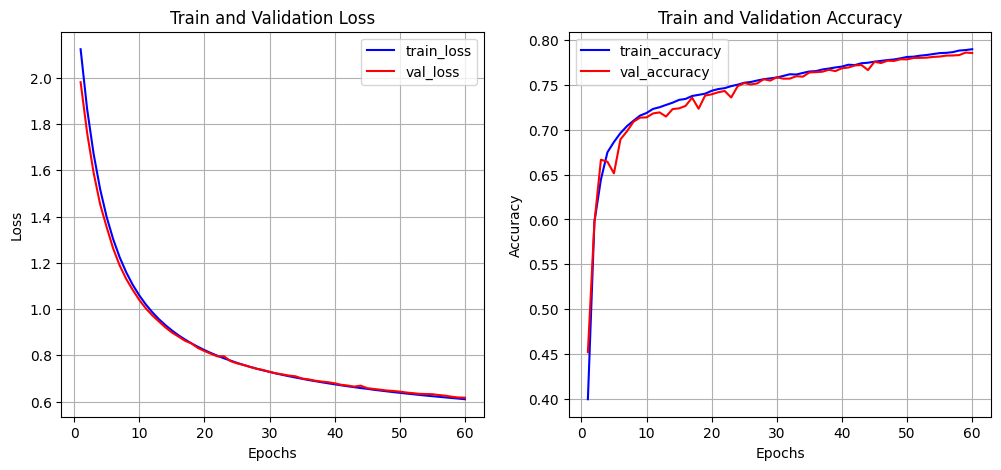

In [15]:
show_history(history)

## 모델 평가 및 예측
- 모델이 학습한 결과를 평가하기 위해서는 테스트 데이터셋인 x_test와 y_test를 지정하여 evaluate()를 실행시킵니다.
- 실행 결과로는 모델이 테스트 데이터셋에서는 어느 정도의 성능이 나오는지 loss와 accuracy 값을 살펴볼 수 있습니다.

- accuracy: 0.7849와 0.779999... 간의 오차는 소수점 반올림 차이 또는 출력 포맷 차이로 인해 발생할 수 있음

- evaluate()는 정밀한 실수(float)를 반환

- 콘솔 출력은 소수 4자리로 반올림되어 다소 다르게 보일 수 있음

In [16]:
model.evaluate(x_test, y_test,batch_size=64) # 여기에는 batch_size가 32로 자동 할당 변경해도 됨 그래서 313이 나옴

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7790 - loss: 0.6271


[0.6306874752044678, 0.7754999995231628]

### 학습된 모델을 이용해서 예측을 하기 위해서는 predict()를 실행시킵니다.
- 테스트 데이터 셋인 x_test에 대해 모델의 예측 결과인 pred_ys 중에 5번째를 출력해보면, 분류 10개마다 얼만큼의 비율로 예측했는지 알 수 있습니다.

- 분류 10개의 각 값들 중에 가장 큰 값이 있는 위치를 반환하도록 argmax()를 수행한 결과를 arg_pred_y에 저장합니다.
- 예시로 5번째를 출력해보면 결과로 1이 나오는 것을 알 수 있습니다. 인덱스 1에 해당하는 클래스가 무엇인지 class_names 리스트에서 가져오면 Trouser가 출력되는 것을 알 수 있습니다.

In [17]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[1.5147454e-02 9.3793195e-01 4.0206290e-03 1.5099110e-02 2.1575052e-02
 4.1947627e-05 6.0477704e-03 2.4088358e-05 9.6779637e-05 1.5277215e-05]
1
Trouser


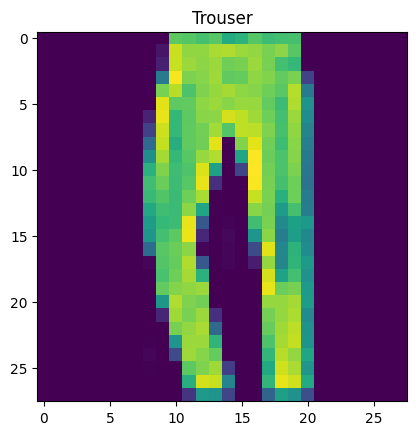

In [18]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

### 이미지와 레이블을 함께 출력하기 위해서 plot_image() 함수를 정의합니다.
- 모델이 예측한 값인 pred_ys, 테스트 데이터셋의 정답인 y_test, 그리고 이미지 img에 대해서 i 번째를 가져와서 출력을 수행합니다.
- 여기서 예측한 결과 레이블인 predicted_label과 정답 레이블인 y_test가 동일하면 색으로 blue를 사용하고,
- 다르면 red 색을 사용하도록 지정합니다. 이제 예측한 레이블의 이름, 예측한 확률값, 실제 정답 레이블의 이름을 지정한 색으로 출력합니다.

In [19]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

### 전체 10개 분류 중에서 어떤 클래스에 얼만큼의 확률로 예측을 했는지 출력해주는 plot_class() 함수를 정의합니다.
- 예측한 결과 레이블인 pred_ys와 정답 레이블인 true_label에서 i 번째의 데이터에 대한 10개 클래스 값들을 바 차트로 시각화합니다.
- 기본적으로는 색을 darkgray로 지정하고, 예측한 레이블은 red 색상으로 표시하고, 정답 레이블은 blue 색상으로 표시합니다.

In [20]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

### 5번째 데이터에 대해서 정의한 plot_image()와 plot_class() 함수를 호출하여 시각화합니다. 결과를 보면 모델이 Trouser라고 95% 확률로 예측한 것을 알 수 있습니다.

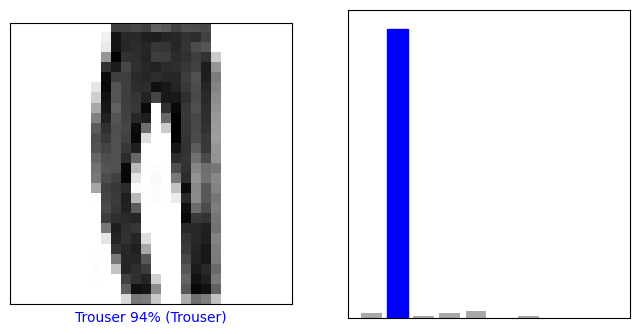

In [21]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

### 10번째 데이터에 대해서도 마찬가지로 출력을 합니다. 그러나 결과를 보면, 모델은 Pullover로 예측을 했지만, 실제 정답은 Coat인 것으로 알 수 있습니다.

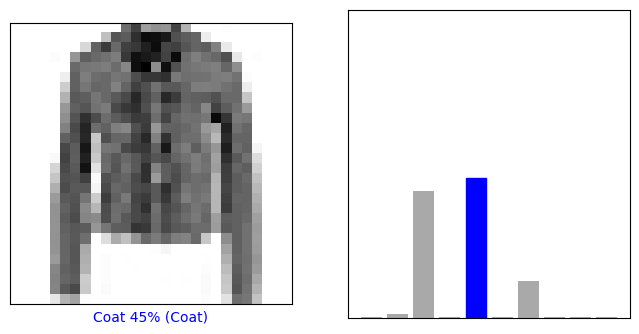

In [22]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

### 이제 모델 예측 결과 여러 개를 눈으로 확인할 수 있도록 32(8x4)개를 출력하도록 합니다.

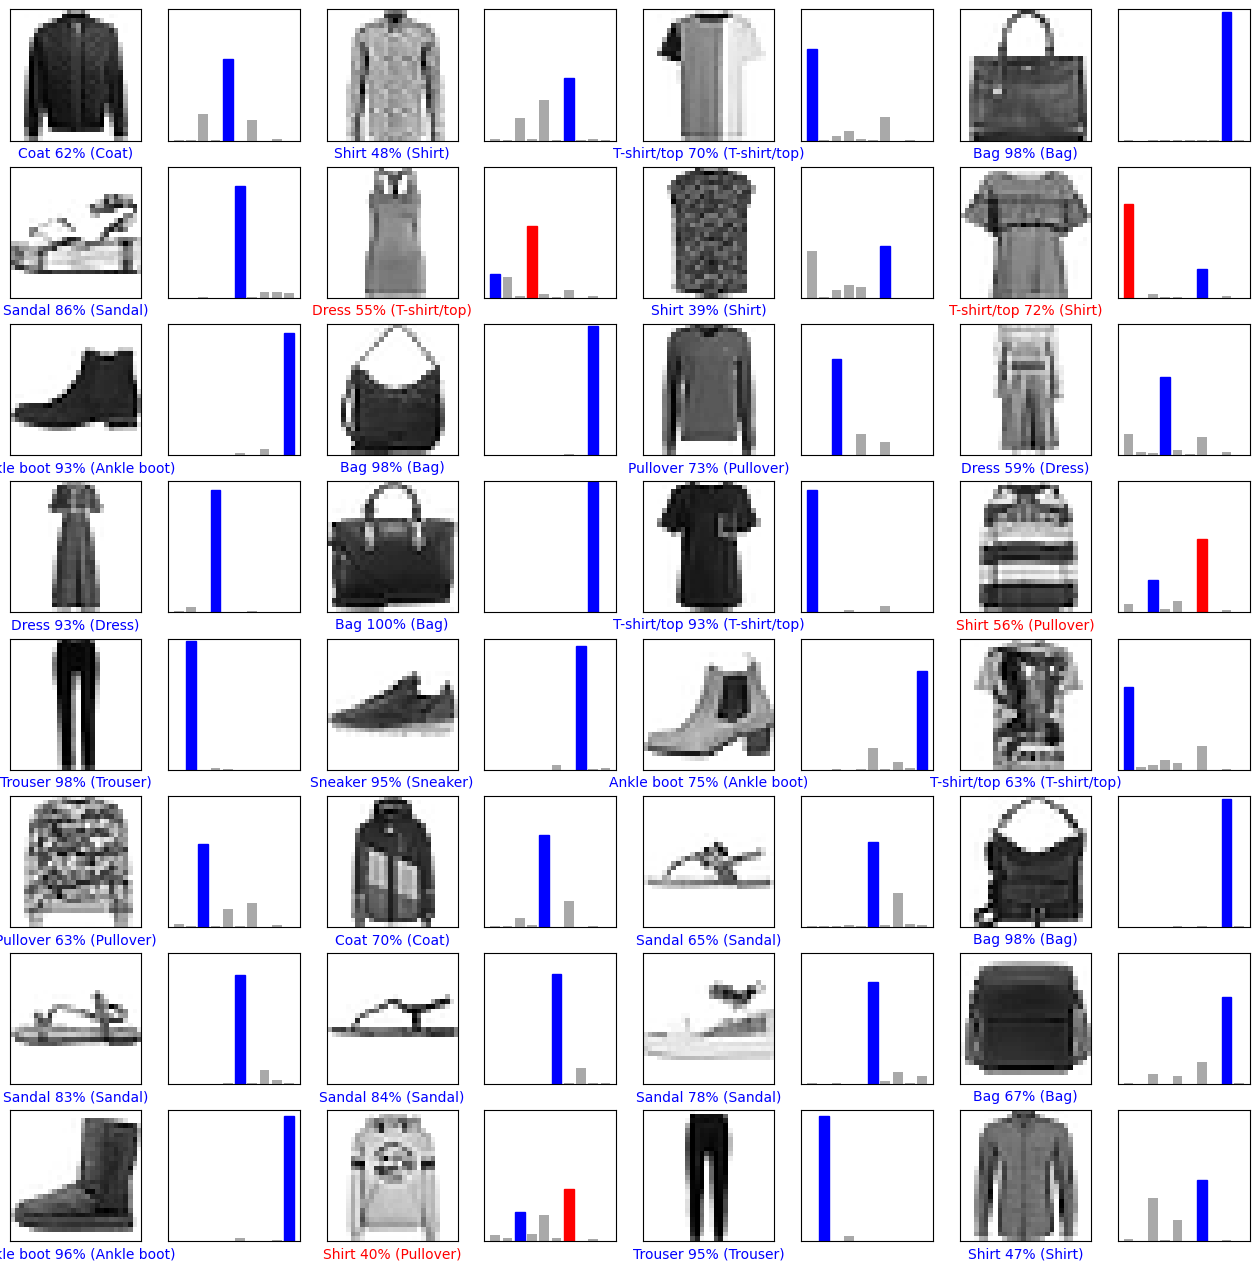

In [23]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

### classification_report를 이용하여 Fashion MNIST를 분류하는 모델의 결과를 10개 분류 기준 별로 precision, recall, f1-score, support를 살펴볼 수 있습니다.

In [24]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.75      0.79      0.77      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.72      0.54      0.62      1000
       Dress       0.76      0.83      0.80      1000
        Coat       0.63      0.74      0.68      1000
      Sandal       0.85      0.82      0.84      1000
       Shirt       0.46      0.44      0.45      1000
     Sneaker       0.83      0.86      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



## confusion_matrix를 이용해서 예측한 레이블과 실제 레이블과의 일치 여부를 혼동 행렬(confusion matrix)로 시각화할 수 있습니다.

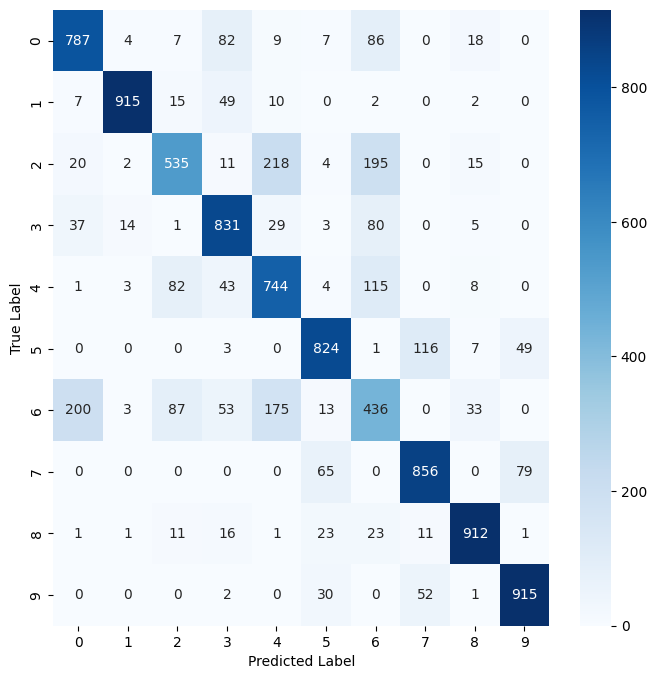

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 모델최적화
### Early Stopping
- 딥러닝 모델이 학습을 진행하면서 가장 좋은 모델이 fashion_mnist_model.h5 파일로 저장되도록
- 콜백 함수로 ModelCheckpoint를 사용해 봅시다. 또한 val_loss 값을 10개씩 연속으로 모니터링하며 성능 변화가 없으면 조기 종료되도록 EarlyStopping을 사용합니다.

- 정의한 콜백 함수를 사용하여 fit() 함수를 실행하여 실제 모델 학습을 진행합시다.

In [26]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7900 - loss: 0.6051

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7901 - loss: 0.6051 - val_accuracy: 0.7967 - val_loss: 0.5855
Epoch 2/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8019 - loss: 0.5697

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8019 - loss: 0.5697 - val_accuracy: 0.8019 - val_loss: 0.5657
Epoch 3/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8058 - loss: 0.5512

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8058 - loss: 0.5511 - val_accuracy: 0.8092 - val_loss: 0.5483
Epoch 4/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8156 - loss: 0.5331

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8156 - loss: 0.5331 - val_accuracy: 0.8141 - val_loss: 0.5326
Epoch 5/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8207 - loss: 0.5193

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8207 - loss: 0.5193 - val_accuracy: 0.8178 - val_loss: 0.5238
Epoch 6/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8245 - loss: 0.5120

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8245 - loss: 0.5120 - val_accuracy: 0.8221 - val_loss: 0.5119
Epoch 7/60
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8252 - loss: 0.4979

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8252 - loss: 0.4979 - val_accuracy: 0.8257 - val_loss: 0.5030
Epoch 8/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8304 - loss: 0.4859

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8304 - loss: 0.4859 - val_accuracy: 0.8231 - val_loss: 0.5014
Epoch 9/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8343 - loss: 0.4814

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8343 - loss: 0.4814 - val_accuracy: 0.8296 - val_loss: 0.4896
Epoch 10/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8362 - loss: 0.4693

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8362 - loss: 0.4694 - val_accuracy: 0.8292 - val_loss: 0.4893
Epoch 11/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8340 - loss: 0.4767

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8340 - loss: 0.4766 - val_accuracy: 0.8337 - val_loss: 0.4800
Epoch 12/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8373 - loss: 0.4650

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8373 - loss: 0.4650 - val_accuracy: 0.8357 - val_loss: 0.4749
Epoch 13/60
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8386 - loss: 0.4572

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8386 - loss: 0.4572 - val_accuracy: 0.8369 - val_loss: 0.4713
Epoch 14/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8405 - loss: 0.4513

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8405 - loss: 0.4513 - val_accuracy: 0.8354 - val_loss: 0.4690
Epoch 15/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8426 - loss: 0.4505

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8426 - loss: 0.4505 - val_accuracy: 0.8402 - val_loss: 0.4634
Epoch 16/60
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8413 - loss: 0.4502

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8413 - loss: 0.4501 - val_accuracy: 0.8396 - val_loss: 0.4612
Epoch 17/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 0.4469

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8454 - loss: 0.4469 - val_accuracy: 0.8417 - val_loss: 0.4573
Epoch 18/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8476 - loss: 0.4352 - val_accuracy: 0.8412 - val_loss: 0.4577
Epoch 19/60
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8436 - loss: 0.4411

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8436 - loss: 0.4410 - val_accuracy: 0.8448 - val_loss: 0.4517
Epoch 20/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8465 - loss: 0.4339

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8465 - loss: 0.4339 - val_accuracy: 0.8445 - val_loss: 0.4508
Epoch 21/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8472 - loss: 0.4362 - val_accuracy: 0.8384 - val_loss: 0.4578
Epoch 22/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8519 - loss: 0.4293 - val_accuracy: 0.8439 - val_loss: 0.4509
Epoch 23/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8503 - loss: 0.4293

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8503 - loss: 0.4293 - val_accuracy: 0.8459 - val_loss: 0.4475
Epoch 24/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.4250

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8481 - loss: 0.4250 - val_accuracy: 0.8488 - val_loss: 0.4445
Epoch 25/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8512 - loss: 0.4182

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8512 - loss: 0.4182 - val_accuracy: 0.8491 - val_loss: 0.4413
Epoch 26/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8527 - loss: 0.4157

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8526 - loss: 0.4157 - val_accuracy: 0.8502 - val_loss: 0.4381
Epoch 27/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8517 - loss: 0.4208 - val_accuracy: 0.8499 - val_loss: 0.4382
Epoch 28/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8543 - loss: 0.4171

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8543 - loss: 0.4171 - val_accuracy: 0.8501 - val_loss: 0.4366
Epoch 29/60
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8556 - loss: 0.4110

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8556 - loss: 0.4111 - val_accuracy: 0.8503 - val_loss: 0.4348
Epoch 30/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8517 - loss: 0.4148

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8517 - loss: 0.4148 - val_accuracy: 0.8513 - val_loss: 0.4328
Epoch 31/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8570 - loss: 0.4014

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8570 - loss: 0.4014 - val_accuracy: 0.8534 - val_loss: 0.4321
Epoch 32/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8519 - loss: 0.4141

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8520 - loss: 0.4141 - val_accuracy: 0.8526 - val_loss: 0.4301
Epoch 33/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8579 - loss: 0.4029 - val_accuracy: 0.8509 - val_loss: 0.4319
Epoch 34/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8587 - loss: 0.4032

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8587 - loss: 0.4032 - val_accuracy: 0.8529 - val_loss: 0.4278
Epoch 35/60
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8551 - loss: 0.4080

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8551 - loss: 0.4080 - val_accuracy: 0.8537 - val_loss: 0.4272
Epoch 36/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8565 - loss: 0.4013

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8565 - loss: 0.4013 - val_accuracy: 0.8557 - val_loss: 0.4249
Epoch 37/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8571 - loss: 0.4023

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8571 - loss: 0.4023 - val_accuracy: 0.8546 - val_loss: 0.4241
Epoch 38/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8590 - loss: 0.4001 - val_accuracy: 0.8537 - val_loss: 0.4256
Epoch 39/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8552 - loss: 0.4029

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8552 - loss: 0.4029 - val_accuracy: 0.8541 - val_loss: 0.4224
Epoch 40/60
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8619 - loss: 0.3911

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8619 - loss: 0.3911 - val_accuracy: 0.8549 - val_loss: 0.4215
Epoch 41/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8571 - loss: 0.4019

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8571 - loss: 0.4019 - val_accuracy: 0.8534 - val_loss: 0.4214
Epoch 42/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8581 - loss: 0.3922 - val_accuracy: 0.8498 - val_loss: 0.4265
Epoch 43/60
1301/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8629 - loss: 0.3886

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8629 - loss: 0.3887 - val_accuracy: 0.8539 - val_loss: 0.4191
Epoch 44/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8666 - loss: 0.3870

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8665 - loss: 0.3870 - val_accuracy: 0.8579 - val_loss: 0.4163
Epoch 45/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8653 - loss: 0.3798 - val_accuracy: 0.8534 - val_loss: 0.4186
Epoch 46/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8612 - loss: 0.3864

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8612 - loss: 0.3864 - val_accuracy: 0.8561 - val_loss: 0.4154
Epoch 47/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8627 - loss: 0.3850

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8627 - loss: 0.3850 - val_accuracy: 0.8582 - val_loss: 0.4143
Epoch 48/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8640 - loss: 0.3827

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8640 - loss: 0.3827 - val_accuracy: 0.8567 - val_loss: 0.4128
Epoch 49/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8650 - loss: 0.3864 - val_accuracy: 0.8590 - val_loss: 0.4135
Epoch 50/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8653 - loss: 0.3829 - val_accuracy: 0.8577 - val_loss: 0.4158
Epoch 51/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8665 - loss: 0.3770 - val_accuracy: 0.8542 - val_loss: 0.4183
Epoch 52/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8606 - loss: 0.3881 - val_accuracy: 0.8552 - val_loss: 0.4156
Epoch 53/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8659 - loss: 0.3765

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8659 - loss: 0.3765 - val_accuracy: 0.8592 - val_loss: 0.4101
Epoch 54/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8679 - loss: 0.3798 - val_accuracy: 0.8576 - val_loss: 0.4107
Epoch 55/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8649 - loss: 0.3848

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8649 - loss: 0.3848 - val_accuracy: 0.8599 - val_loss: 0.4077
Epoch 56/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8656 - loss: 0.3766 - val_accuracy: 0.8581 - val_loss: 0.4088
Epoch 57/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8714 - loss: 0.3654 - val_accuracy: 0.8583 - val_loss: 0.4091
Epoch 58/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8657 - loss: 0.3739

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8657 - loss: 0.3740 - val_accuracy: 0.8603 - val_loss: 0.4057
Epoch 59/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8697 - loss: 0.3730 - val_accuracy: 0.8593 - val_loss: 0.4064
Epoch 60/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8685 - loss: 0.3747

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8685 - loss: 0.3747 - val_accuracy: 0.8602 - val_loss: 0.4054


모델의 학습 히스토리를 시각화합니다.

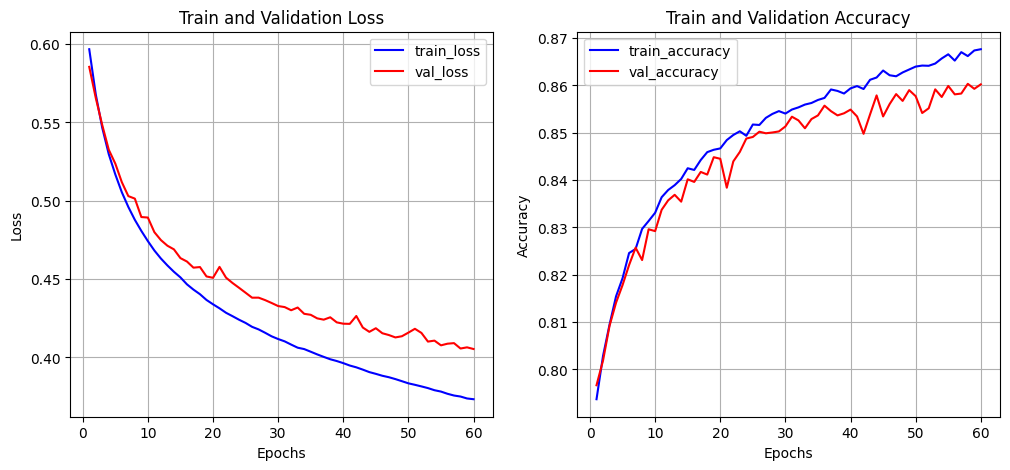

In [27]:
show_history(history)

모델의 평가 결과도 테스트 데이터셋을 이용해 확인합니다.

In [28]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.4208


[0.42622095346450806, 0.8489000201225281]

## 활성화함수 변경 모델구성 (relu)

In [29]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))  # 입력층: 784차원 벡터
model.add(layers.Dense(512, activation='relu'))  # 은닉층: 512개 노드, relu 함수
# - 512: 복잡한 패턴을 학습할 수 있는 중간 크기 노드 수

model.add(layers.Dense(10, activation='softmax'))   # 출력층: 10개 노드, softmax 함수
model.summary()  # 모델 구조 요약 출력




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### relu 컴파일

In [30]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

### relu 모델.fit

In [31]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6925 - loss: 1.0134 - val_accuracy: 0.8105 - val_loss: 0.5736
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8197 - loss: 0.5470 - val_accuracy: 0.8289 - val_loss: 0.5043
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8283 - loss: 0.4966 - val_accuracy: 0.8328 - val_loss: 0.4841
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8406 - loss: 0.4629 - val_accuracy: 0.8280 - val_loss: 0.4848
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8521 - loss: 0.4317 - val_accuracy: 0.8513 - val_loss: 0.4393
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8578 - loss: 0.4164 - val_accuracy: 0.8526 - val_loss: 0.4342
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8607 - loss: 0.4000 - val_accuracy: 0.8576 - val_loss: 0.4215
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8591 - loss: 0.403

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8773 - loss: 0.3549 - val_accuracy: 0.8651 - val_loss: 0.3932
Epoch 14/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8759 - loss: 0.3562

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8759 - loss: 0.3562 - val_accuracy: 0.8695 - val_loss: 0.3805
Epoch 15/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8797 - loss: 0.3474

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8797 - loss: 0.3474 - val_accuracy: 0.8712 - val_loss: 0.3757
Epoch 16/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8772 - loss: 0.3477 - val_accuracy: 0.8715 - val_loss: 0.3759
Epoch 17/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8811 - loss: 0.3369 - val_accuracy: 0.8683 - val_loss: 0.3790
Epoch 18/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8827 - loss: 0.3316

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8827 - loss: 0.3316 - val_accuracy: 0.8708 - val_loss: 0.3720
Epoch 19/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8837 - loss: 0.3288 - val_accuracy: 0.8670 - val_loss: 0.3782
Epoch 20/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8873 - loss: 0.3207 - val_accuracy: 0.8683 - val_loss: 0.3783
Epoch 21/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8874 - loss: 0.3218

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8874 - loss: 0.3218 - val_accuracy: 0.8737 - val_loss: 0.3629
Epoch 22/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8911 - loss: 0.3159

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8911 - loss: 0.3159 - val_accuracy: 0.8747 - val_loss: 0.3584
Epoch 23/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8882 - loss: 0.3105 - val_accuracy: 0.8722 - val_loss: 0.3662
Epoch 24/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8898 - loss: 0.3103

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8898 - loss: 0.3103 - val_accuracy: 0.8776 - val_loss: 0.3560
Epoch 25/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8938 - loss: 0.2990 - val_accuracy: 0.8710 - val_loss: 0.3712
Epoch 26/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8960 - loss: 0.2983

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8959 - loss: 0.2983 - val_accuracy: 0.8767 - val_loss: 0.3539
Epoch 27/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8931 - loss: 0.2943 - val_accuracy: 0.8721 - val_loss: 0.3673
Epoch 28/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8957 - loss: 0.2931

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8957 - loss: 0.2931 - val_accuracy: 0.8791 - val_loss: 0.3495
Epoch 29/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8979 - loss: 0.2895

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8978 - loss: 0.2895 - val_accuracy: 0.8806 - val_loss: 0.3421
Epoch 30/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8994 - loss: 0.2852 - val_accuracy: 0.8798 - val_loss: 0.3475
Epoch 31/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9003 - loss: 0.2806 - val_accuracy: 0.8798 - val_loss: 0.3434
Epoch 32/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9005 - loss: 0.2852 - val_accuracy: 0.8807 - val_loss: 0.3441
Epoch 33/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9009 - loss: 0.2788 - val_accuracy: 0.8784 - val_loss: 0.3437
Epoch 34/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9036 - loss: 0.2759

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9036 - loss: 0.2759 - val_accuracy: 0.8823 - val_loss: 0.3395
Epoch 35/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9010 - loss: 0.2769 - val_accuracy: 0.8773 - val_loss: 0.3513
Epoch 36/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9055 - loss: 0.2730

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9055 - loss: 0.2730 - val_accuracy: 0.8860 - val_loss: 0.3324
Epoch 37/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9064 - loss: 0.2670 - val_accuracy: 0.8813 - val_loss: 0.3416
Epoch 38/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9061 - loss: 0.2674

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9061 - loss: 0.2674 - val_accuracy: 0.8855 - val_loss: 0.3319
Epoch 39/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9091 - loss: 0.2609 - val_accuracy: 0.8832 - val_loss: 0.3370
Epoch 40/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9104 - loss: 0.2576 - val_accuracy: 0.8824 - val_loss: 0.3378
Epoch 41/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9122 - loss: 0.2533 - val_accuracy: 0.8842 - val_loss: 0.3328
Epoch 42/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9113 - loss: 0.2521

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9112 - loss: 0.2521 - val_accuracy: 0.8856 - val_loss: 0.3295
Epoch 43/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9103 - loss: 0.2496

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9103 - loss: 0.2496 - val_accuracy: 0.8872 - val_loss: 0.3269
Epoch 44/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9092 - loss: 0.2535

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9092 - loss: 0.2535 - val_accuracy: 0.8868 - val_loss: 0.3269
Epoch 45/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9121 - loss: 0.2450 - val_accuracy: 0.8749 - val_loss: 0.3480
Epoch 46/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9150 - loss: 0.2417 - val_accuracy: 0.8837 - val_loss: 0.3347
Epoch 47/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9146 - loss: 0.2448

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9146 - loss: 0.2448 - val_accuracy: 0.8879 - val_loss: 0.3231
Epoch 48/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9133 - loss: 0.2425 - val_accuracy: 0.8862 - val_loss: 0.3272
Epoch 49/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9169 - loss: 0.2391 - val_accuracy: 0.8816 - val_loss: 0.3341
Epoch 50/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9198 - loss: 0.2328 - val_accuracy: 0.8855 - val_loss: 0.3315
Epoch 51/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9196 - loss: 0.2303 - val_accuracy: 0.8849 - val_loss: 0.3288
Epoch 52/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9179 - loss: 0.2303

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9179 - loss: 0.2303 - val_accuracy: 0.8902 - val_loss: 0.3189
Epoch 53/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9204 - loss: 0.2252

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9204 - loss: 0.2252 - val_accuracy: 0.8904 - val_loss: 0.3185
Epoch 54/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9188 - loss: 0.2260 - val_accuracy: 0.8883 - val_loss: 0.3300
Epoch 55/60
1300/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9210 - loss: 0.2262

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9210 - loss: 0.2262 - val_accuracy: 0.8918 - val_loss: 0.3158
Epoch 56/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9209 - loss: 0.2254 - val_accuracy: 0.8815 - val_loss: 0.3427
Epoch 57/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9246 - loss: 0.2189 - val_accuracy: 0.8918 - val_loss: 0.3182
Epoch 58/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9276 - loss: 0.2146 - val_accuracy: 0.8852 - val_loss: 0.3297
Epoch 59/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9259 - loss: 0.2182 - val_accuracy: 0.8911 - val_loss: 0.3176
Epoch 60/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9216 - loss: 0.2184 - val_accuracy: 0.8867 - val_loss: 0.3266


### 두 개의 모델 학습 히스토리를 차트로 비교할 수 있도록 시각화하는 diff_history() 함수를 정의합니다.

In [32]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

기존 모델과 활성화 함수를 relu로 변경한 모델의 학습 결과를 시각화합니다.

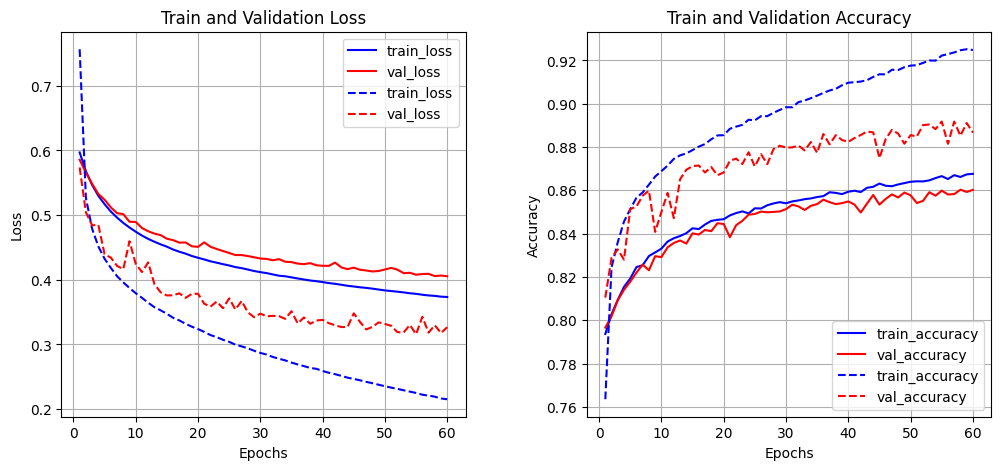

In [33]:
diff_history(history, history2)

활성화 함수를 변경한 모델의 평가 결과를 확인합니다.

In [34]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8789 - loss: 0.3383


[0.33981019258499146, 0.8790000081062317]

### 옵티마이저 변경 (SGD --> Adam)
-  SGD를 사용했는데, 좀 더 빠르고 효과적인 학습이 가능하도록 Adam으로

In [35]:
# 직접 코드를 입력해보세요
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [36]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8560 - loss: 0.4128 - val_accuracy: 0.8677 - val_loss: 0.3774
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8798 - loss: 0.3331 - val_accuracy: 0.8770 - val_loss: 0.3540
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8865 - loss: 0.3102 - val_accuracy: 0.8664 - val_loss: 0.3744
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8942 - loss: 0.2899 - val_accuracy: 0.8727 - val_loss: 0.3525
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8994 - loss: 0.2692 - val_accuracy: 0.8807 - val_loss: 0.3461
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9025 - loss: 0.2627 - val_accuracy: 0.8833 - val_loss: 0.3322
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9095 - loss: 0.2417 - val_accuracy: 0.8840 - val_loss: 0.3370
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9083 - l

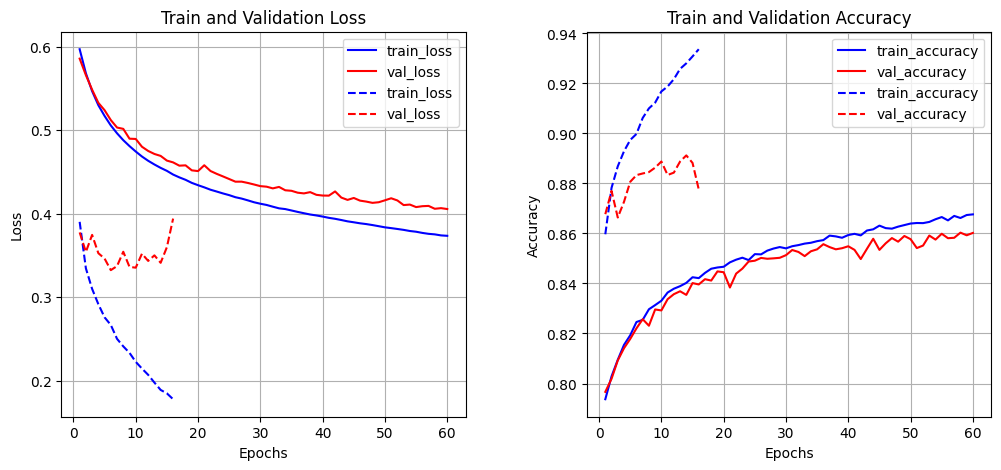

In [37]:
diff_history(history, history3)

옵티마이저를 변경한 모델의 평가 결과를 확인합니다.

In [38]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8726 - loss: 0.3529


[0.35322970151901245, 0.8744999766349792]

## 규제 L2
- 모델에서 과대적합이 발생하는 부분을 규제하기 위해서 중간의 Dense 레이어에 L2 규제 방법을 적용합니다.

- 아래 코드 블럭에서 한 번 직접 모델을 작성해보세요!

In [39]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))  # 입력층: 784차원 벡터
model.add(layers.Dense(512, activation='relu',
                       kernel_regularizer=regularizers.l2(0.001)))  # L2 정규화 포함
model.add(layers.Dense(10, activation='softmax'))   # 출력층: 10개 노드, softmax 함수
model.summary()  # 모델 구조 요약 출력

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# 직접 코드를 입력해보세요
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [41]:
history4 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7736 - loss: 0.9707 - val_accuracy: 0.8425 - val_loss: 0.5793
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8441 - loss: 0.5577 - val_accuracy: 0.8438 - val_loss: 0.5594
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8500 - loss: 0.5226 - val_accuracy: 0.8307 - val_loss: 0.5490
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8525 - loss: 0.4971 - val_accuracy: 0.8510 - val_loss: 0.5219
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8584 - loss: 0.4804 - val_accuracy: 0.8614 - val_loss: 0.4843
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8636 - loss: 0.4651 - val_accuracy: 0.8692 - val_loss: 0.4557
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8698 - loss: 0.4458 - val_accuracy: 0.8612 - val_loss: 0.4761
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8680 -

기존 모델 학습 결과와 L2 규제 방법을 적용한 모델의 학습 결과를 살펴보면, 성능은 일부 저하되지만 어느정도 과대적합을 억제하는 것을 알 수 있습니다.

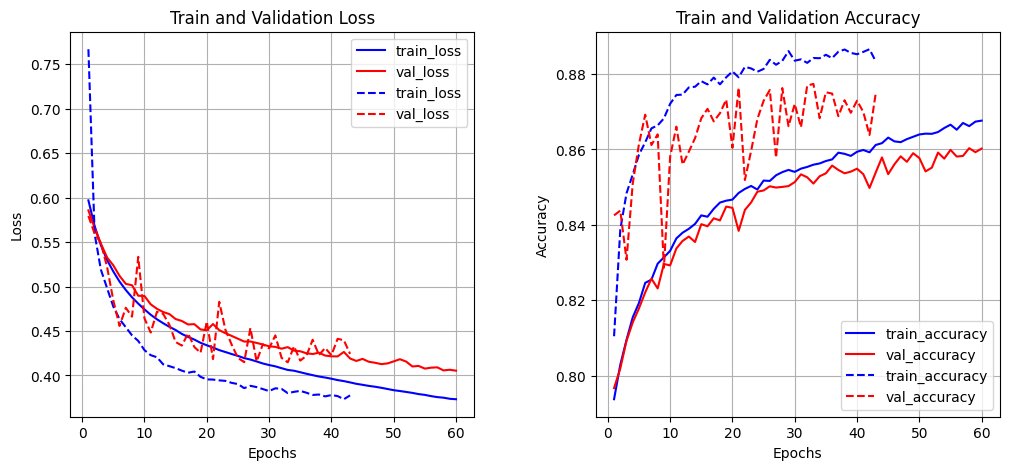

In [42]:
diff_history(history, history4)

## 드롭아웃
모델에서 성능 저하를 최소화하면서 과대적합을 억제하기 위한 방법으로 Dense 레이어 사이에 50%의 Dropout 레이어를 적용합니다.
아래 코드 블럭에서 한 번 직접 모델을 작성해보세요!

In [43]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))  # 입력층: 784차원 벡터
model.add(layers.Dense(512, activation='relu',
                       kernel_regularizer=regularizers.l2(0.001)))  # L2 정규화 포함
model.add(layers.Dropout(0.5))  # 드롭아웃: 과적합 방지
model.add(layers.Dense(10, activation='softmax'))   # 출력층: 10개 노드, softmax 함수
# model.add(layers.Dense(10, activation='softmax'))   # 출력층: 10개 노드, softmax 함수
model.summary()  # 모델 구조 요약 출력

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [45]:
history5 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7279 - loss: 1.1336 - val_accuracy: 0.8209 - val_loss: 0.6760
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8117 - loss: 0.6805 - val_accuracy: 0.8408 - val_loss: 0.5862
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8197 - loss: 0.6272 - val_accuracy: 0.8323 - val_loss: 0.5791
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8157 - loss: 0.6274 - val_accuracy: 0.8431 - val_loss: 0.5608
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8197 - loss: 0.6195 - val_accuracy: 0.8474 - val_loss: 0.5465
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8230 - loss: 0.6097 - val_accuracy: 0.8304 - val_loss: 0.5679
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8194 - loss: 0.6054 - val_accuracy: 0.8475 - val_loss: 0.5477
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8194 -

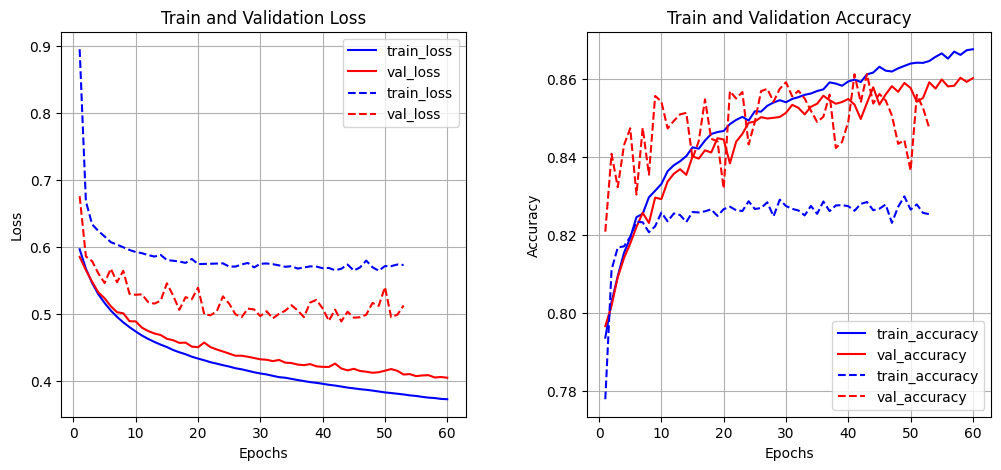

In [46]:
diff_history(history, history5)

규제 방법 중에 L2 규제보다는 드롭아웃 방법이 더 좋은 결과를 보여주는 것을 알 수 있습니다.

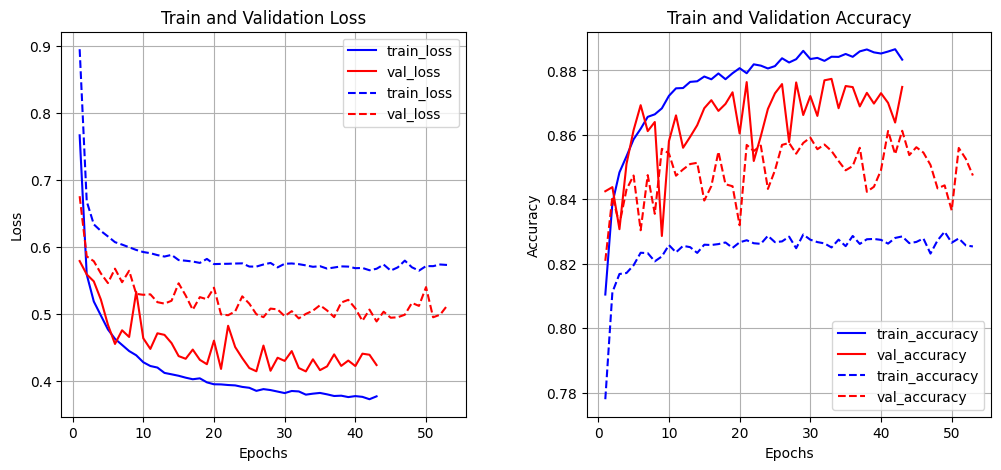

In [47]:
diff_history(history4, history5)

In [48]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8523 - loss: 0.5068


[0.5157669186592102, 0.8474000096321106]

## 배치 정규화 + Dropout
- 빠르고 효과적인 학습을 도와주는 배치 정규화도 적용해보기 위해 Dense 레이어
- 다음에 BatchNormalization 레이어를 추가하고, 이후 활성화 함수 Activation 레이어를 추가합니다.

In [49]:
model = models.Sequential()
model.add(layers.Input(shape=(784,)))  # 입력층: 784차원 벡터
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001)))  # L2 정규화 포함
model.add(layers.BatchNormalization())  # 배치 정규화 추가
model.add(layers.Activation('relu'))  # 활성화 함수 분리 적용
model.add(layers.Dropout(0.5))  # 드롭아웃: 과적합 방지
model.add(layers.Dense(10, activation='softmax'))   # 출력층: 10개 노드, softmax 함수
model.summary()  # 모델 구조 요약 출력

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,098 (1.56 MB)

 Trainable params: 408,074 (1.56 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [50]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [51]:
history6 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.7513 - loss: 1.1593 - val_accuracy: 0.8206 - val_loss: 0.7122
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8150 - loss: 0.6916 - val_accuracy: 0.8101 - val_loss: 0.6615
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8177 - loss: 0.6573 - val_accuracy: 0.7799 - val_loss: 0.7455
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8172 - loss: 0.6513 - val_accuracy: 0.7625 - val_loss: 0.7915
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8229 - loss: 0.6479 - val_accuracy: 0.8328 - val_loss: 0.6082
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8216 - loss: 0.6416 - val_accuracy: 0.8352 - val_loss: 0.6178
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8237 - loss: 0.6358 - val_accuracy: 0.8452 - val_loss: 0.5853
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8254 -

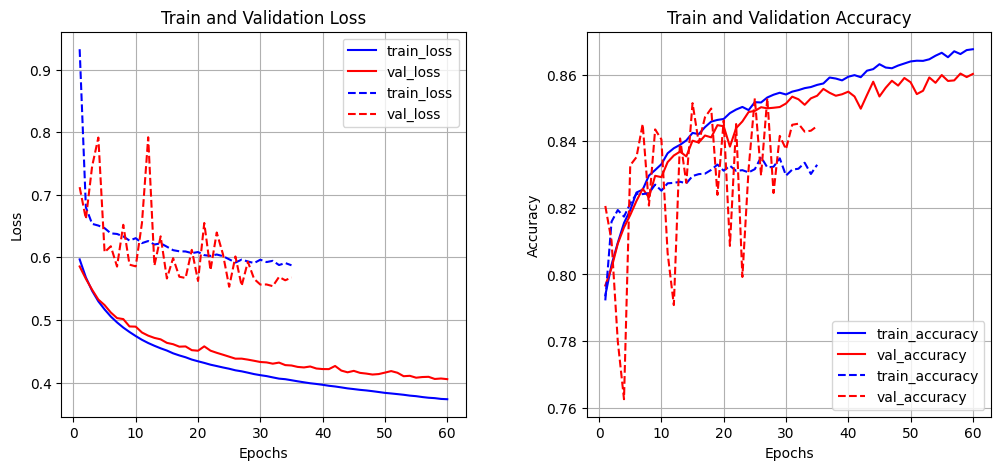

In [52]:
diff_history(history, history6)

In [53]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8478 - loss: 0.5721


[0.5783733129501343, 0.8432000279426575]

## 모델 결과 분석
- 랜덤으로 데이터를 선별하여 최종적으로 최적화를 수행한 모델이 분류한 결과를 시각화합니다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


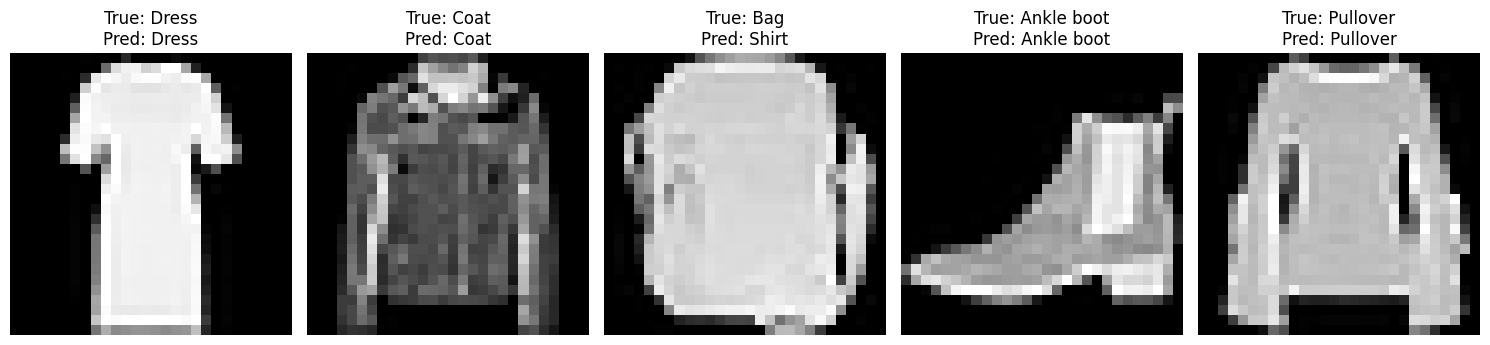

In [54]:
# 직접 코드를 입력해보세요

# 테스트 세트에서 무작위로 5장 선택
num_samples = 5
random_idxs = np.random.randint(len(x_test), size=num_samples)

# 예측 수행
pred_ys = model.predict(x_test)
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_idxs):
    image = x_test[idx].reshape(28, 28)
    true_label = class_names[y_test[idx]]
    pred_label = class_names[arg_pred_y[idx]]

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 최적화한 모델의 분류 결과를 클래스별로 성능 지표를 살펴봅니다.

In [55]:
# 직접 코드를 입력해보세요

from sklearn.metrics import classification_report

# 예측값 (argmax로 다중 클래스 분류 결과 얻기)
pred_ys = model.predict(x_test)
y_pred = np.argmax(pred_ys, axis=1)

# 클래스별 정확도, 정밀도, 재현율, F1-score 출력
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.85      0.80      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.73      0.75      0.74      1000
       Dress       0.91      0.80      0.85      1000
        Coat       0.69      0.82      0.75      1000
      Sandal       0.98      0.89      0.93      1000
       Shirt       0.62      0.54      0.58      1000
     Sneaker       0.87      0.96      0.91      1000
         Bag       0.97      0.91      0.94      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



### 모델의 결과를 혼동 행렬를 통해서 시각화합니다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


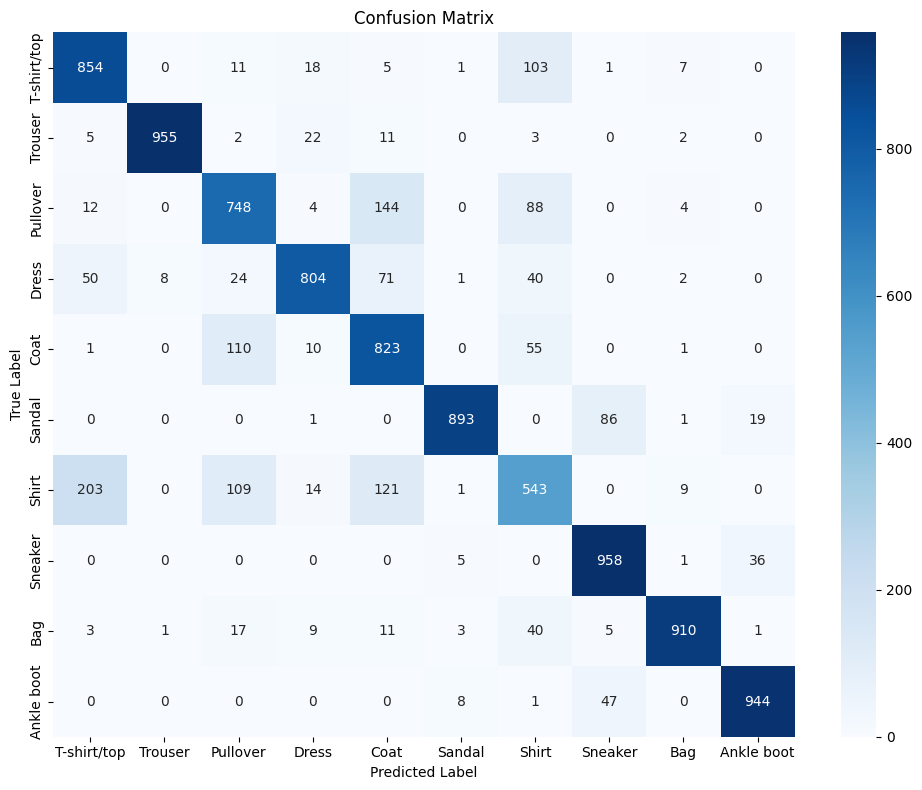

In [56]:
# 직접 코드를 입력해보세요

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 계산
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()